## Actividad 3.5 ej 24

En base al ejemplo de la gráfica mostrada en clase el martes 30 de abril, realizar un análisis entre al menos 3 o 2 países de su interés, considerando el antes y el después de algún hecho notable en la historia de ellos para obtener un análisis de ello y conclusiones personales sobre el uso de este tipo de herramientas para el Big Data.

### origen de la data e informacion de la grafica 

**Link:** https://observablehq.com/@mbostock/the-wealth-health-of-nations?authuser=0#legend

**Descripcion traducida :**  Esta es una recreación de una visualización de Gapminder que se hizo famosa por Hans Rosling. Muestra el ingreso per cápita (x), la esperanza de vida (y) y la población (área) de 180 naciones en los últimos 209 años, coloreadas por región.

grafica creada en originalmente en javascript para propositos de la actividad y para poder obtener informacion mas detallada. se realizara el analisis y manipulacion del archivo .json utilizando python 

 

In [1]:
#importando librerias 
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Parte 1

En esta primera parte realizamos un test simple para poder comprobar que estamos leyendo la informacion bien de el archivo 'nations.json'

In [13]:
# Función para obtener los datos para un año y país específico
def obtener_datos_para_pais_y_anio(datos_paises, nombre_pais, anio):
    for pais in datos_paises:
        if pais['name'] == nombre_pais:
            # Buscar el ingreso para el año especificado
            for entrada in pais['income']:
                if entrada[0] == anio:
                    ingreso = entrada[1]
                    break
            else:
                ingreso = None
                
            # Buscar la población para el año especificado
            for entrada in pais['population']:
                if entrada[0] == anio:
                    poblacion = entrada[1]
                    break
            else:
                poblacion = None
                
            # Buscar la esperanza de vida para el año especificado
            for entrada in pais['lifeExpectancy']:
                if entrada[0] == anio:
                    esperanza_vida = entrada[1]
                    break
            else:
                esperanza_vida = None
                
            # Retornar los datos encontrados
            return {
                'nombre': nombre_pais,
                'ingreso': ingreso,
                'poblacion': poblacion,
                'esperanza_vida': esperanza_vida
            }
    return None

# Leer el archivo JSON
with open('nations.json', 'r') as f:
    datos = json.load(f)


haciendo print de la informacion en 2 años diferentes en este caso pais mexico y años 1970 y 2000

In [14]:
# Obtener los datos para un año y país específico
pais_a_buscar = "Mexico"  # Cambia esto por el país que deseas buscar
anio_a_buscar = 2000  # Cambia esto por el año que deseas buscar

datos_del_pais = obtener_datos_para_pais_y_anio(datos, pais_a_buscar, anio_a_buscar)

if datos_del_pais:
    print("País:", datos_del_pais['nombre'])
    print("Ingreso en", anio_a_buscar, ":", datos_del_pais['ingreso'])
    print("Población en", anio_a_buscar, ":", datos_del_pais['poblacion'])
    print("Esperanza de vida en", anio_a_buscar, ":", datos_del_pais['esperanza_vida'])
else:
    print("Datos no encontrados para", pais_a_buscar, "en", anio_a_buscar)

País: Mexico
Ingreso en 2000 : 10894.51
Población en 2000 : 99926620
Esperanza de vida en 2000 : 74.26


In [15]:
# Obtener los datos para un año y país específico
pais_a_buscar = "Mexico"  # Cambia esto por el país que deseas buscar
anio_a_buscar = 1970  # Cambia esto por el año que deseas buscar

datos_del_pais = obtener_datos_para_pais_y_anio(datos, pais_a_buscar, anio_a_buscar)

if datos_del_pais:
    print("País:", datos_del_pais['nombre'])
    print("Ingreso en", anio_a_buscar, ":", datos_del_pais['ingreso'])
    print("Población en", anio_a_buscar, ":", datos_del_pais['poblacion'])
    print("Esperanza de vida en", anio_a_buscar, ":", datos_del_pais['esperanza_vida'])
else:
    print("Datos no encontrados para", pais_a_buscar, "en", anio_a_buscar)


País: Mexico
Ingreso en 1970 : 6450.93
Población en 1970 : 52775158
Esperanza de vida en 1970 : 61.35


Test de la graficacion en este ejemplo buscamos la evolucion de la esperanza de vida en mexico a traves de los años

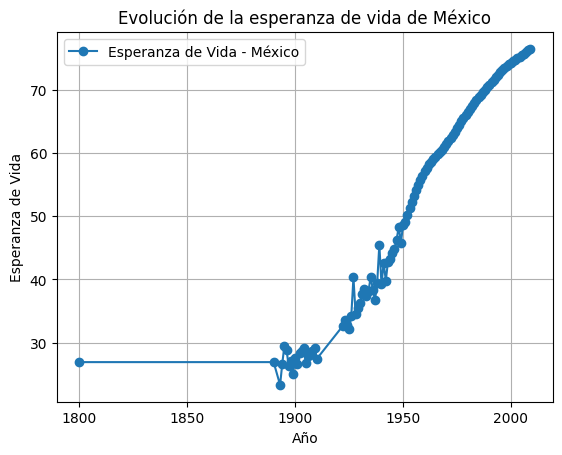

In [23]:
# Función para obtener los datos de esperanza de vida para un país específico
def obtener_datos_esperanza_vida_para_pais(datos_paises, nombre_pais):
    for pais in datos_paises:
        if pais['name'] == nombre_pais:
            anios_esperanza_vida = [x[0] for x in pais['lifeExpectancy']]
            esperanza_vida = [x[1] for x in pais['lifeExpectancy']]
            return {
                'nombre': nombre_pais,
                'anios': anios_esperanza_vida,
                'esperanza_vida': esperanza_vida
            }
    return None

# Obtener los datos de esperanza de vida para México
datos_pais1 = obtener_datos_esperanza_vida_para_pais(datos, "Mexico")

# Graficar la esperanza de vida de México
plt.plot(datos_pais1['anios'], datos_pais1['esperanza_vida'], label='Esperanza de Vida - México', marker='o')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida')
plt.title('Evolución de la esperanza de vida de México')
plt.legend()

plt.grid(True)
plt.show()



## Parte 2

una vez comprobado que manipulamos bien la informacion comenzamos con el tema de investigacion 

# Análisis de la Relación entre Ingreso Per Cápita y Esperanza de Vida de Países

La visualización de datos es una herramienta esencial para comprender y analizar tendencias en grandes conjuntos de datos. En este análisis, exploraremos la relación entre el ingreso per cápita y la esperanza de vida en tres países diferentes, considerando eventos históricos significativos que podrían haber afectado estas variables.

## Países Seleccionados:
- Estados Unidos
- Japón

## Antes y Después de Eventos Significativos:
### Estados Unidos:
- Antes: Antes y después de la Gran Depresión (1929).
- Después: Antes y después de la Segunda Guerra Mundial (1945).

### Japón:
- Antes: Antes y después de la Segunda Guerra Mundial (1945).

# Hipótesis

## Hipótesis General:
Existe una correlación positiva entre el ingreso per cápita y la esperanza de vida en los países seleccionados, lo que significa que a medida que aumenta el ingreso per cápita, también aumenta la esperanza de vida.

## Hipótesis Específicas:

### Hipótesis 1: Antes y después de la Gran Depresión en Estados Unidos:
- Antes de la Gran Depresión, se espera observar una disminución en el ingreso per cápita y, posiblemente, una disminución en la esperanza de vida debido a las condiciones económicas adversas.
- Después de la Gran Depresión, se espera una recuperación económica gradual, lo que podría reflejarse en un aumento del ingreso per cápita y una mejora en la esperanza de vida debido a una mejor calidad de vida.

### Hipótesis 2: Antes y después de la Segunda Guerra Mundial en Estados Unidos:
- Antes de la Segunda Guerra Mundial, se espera un crecimiento económico moderado con un posible aumento en la esperanza de vida.
- Después de la Segunda Guerra Mundial, se espera un período de rápido crecimiento económico, lo que se reflejará en un aumento significativo del ingreso per cápita y una mejora en la esperanza de vida debido a avances médicos y sociales.

### Hipótesis 3: Antes y después de la Segunda Guerra Mundial en Japón:
- Antes de la Segunda Guerra Mundial, Japón experimentó un rápido crecimiento industrial, pero la calidad de vida podría haber sido baja debido a condiciones laborales adversas.
- Después de la Segunda Guerra Mundial, se espera un período de reconstrucción y modernización, lo que podría conducir a un aumento del ingreso per cápita y una mejora en la esperanza de vida.


## Hipótesis 1

### Contexto Historico
La Gran Depresión, también conocida como la Crisis de 1929, fue una gran crisis financiera mundial que se prolongó durante la década de 1930, en los años previos a la Segunda Guerra Mundial. Su duración depende de los países que se analicen, pero en la mayoría comenzó alrededor de 1929 y se extendió hasta finales de los años treinta. Fue la depresión más larga en el tiempo, de mayor profundidad y la que afectó a un mayor número de países en el siglo xx. En el siglo xxi ha sido utilizada como paradigma de hasta qué punto se puede producir un grave deterioro de la economía a escala mundial.

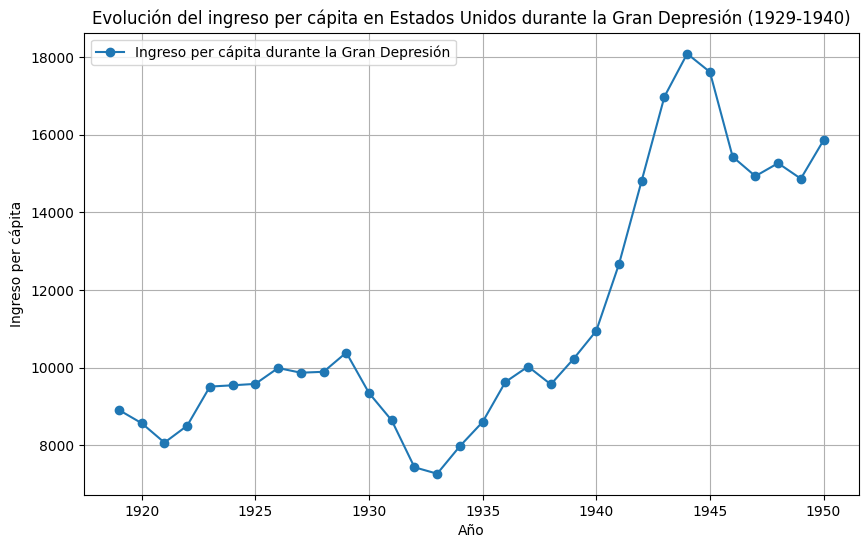

In [76]:

# Obtener datos para Estados Unidos
datos_usa = obtener_datos_para_pais(datos, "United States")

# Filtrar los datos de ingreso per cápita durante la Gran Depresión (1929-1940) agregando 10 anios antes y despues para tener mas contexto 
income_depression = [x[1] for x in datos_usa['income'] if 1919 <= x[0] <= 1950]
years_depression = [x[0] for x in datos_usa['income'] if 1919 <= x[0] <= 1950]


# Graficar el ingreso per cápita durante la Gran Depresión
plt.figure(figsize=(10, 6))
plt.plot(years_depression, income_depression, 'o-', label='Ingreso per cápita durante la Gran Depresión')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ingreso per cápita')
plt.title('Evolución del ingreso per cápita en Estados Unidos durante la Gran Depresión (1929-1940)')
plt.legend()

plt.grid(True)
plt.show()

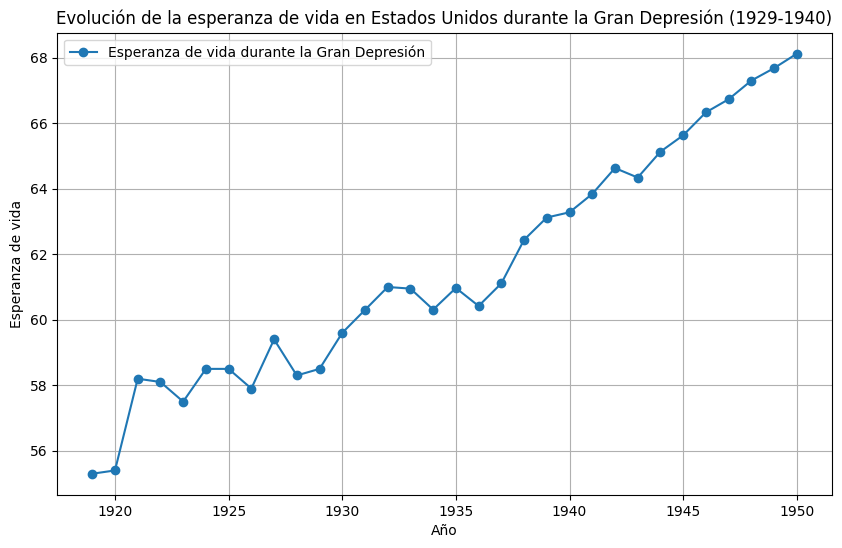

In [77]:

# Obtener datos para Estados Unidos
datos_usa = obtener_datos_para_pais(datos, "United States")

# Filtrar los datos de esperanza de vida durante la Gran Depresión (1929-1940) agregando 10 anios antes y despues para tener mas contexto 
life_depression = [x[1] for x in datos_usa['lifeExpectancy'] if 1919 <= x[0] <= 1950]
years_depression = [x[0] for x in datos_usa['lifeExpectancy'] if 1919 <= x[0] <= 1950]

# Graficar la esperanza de vida durante la Gran Depresión
plt.figure(figsize=(10, 6))
plt.plot(years_depression, life_depression, 'o-', label='Esperanza de vida durante la Gran Depresión')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.title('Evolución de la esperanza de vida en Estados Unidos durante la Gran Depresión (1929-1940)')
plt.legend()

plt.grid(True)
plt.show()


### Conclusiones obtenidas

Conforme a lo esperado tenemos valores en una primera instancia antes de la gran depresion que se pueden considerar constantes y despues del anio 1929 vemos una depresion pronunciada en en el ingreso per capita, ahora revisando la esperanza de vida vemos que se estanco por un momento y despues de el anio 1930 vimos un crecimiento constante anadido a esto vemos otra depresion en los ingresos a partir de 1945 y una leve depresion en la esperanza de vida en lso anios siguientes, lo que nos lleva a 

## Hipotesis 2 y 3 antes y despues de la Segunda guerra mundial en Estados Unidos y Japon

### Contexto Historico

La Segunda Guerra Mundial fue un conflicto global que duró de 1939 a 1945. Fue una guerra entre dos alianzas militares: los Aliados, liderados por Estados Unidos, la Unión Soviética y el Reino Unido, y las Potencias del Eje, lideradas por Alemania, Italia y Japón. Las causas principales incluyeron el resentimiento sobre el Tratado de Versalles tras la Primera Guerra Mundial, la agresión nazi y la expansión del fascismo. La guerra vio importantes eventos como la invasión de Polonia, el ataque a Pearl Harbor, la Batalla de Stalingrado, el Día D y el lanzamiento de bombas atómicas sobre Hiroshima y Nagasaki.




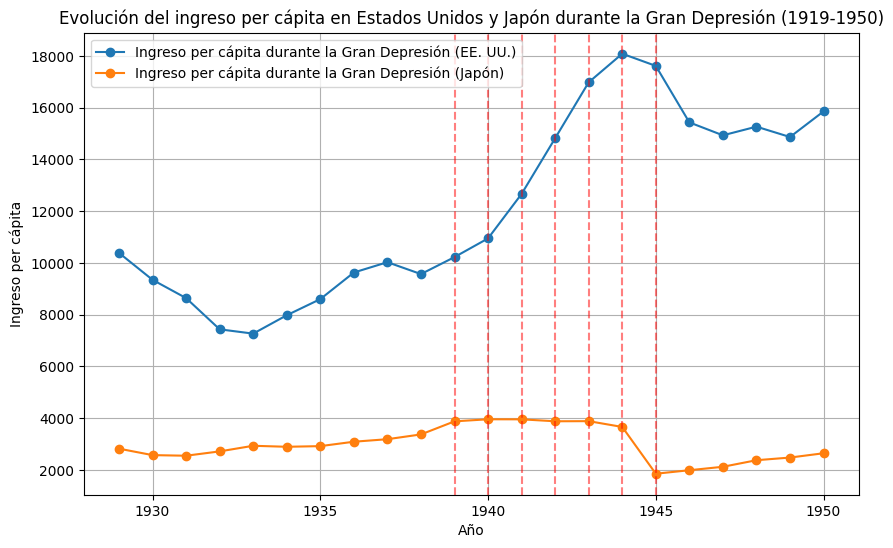

In [81]:
#utilizando el codigo previo y agregando japon
# Obtener datos para Japón
datos_japon = obtener_datos_para_pais(datos, "Japan")

# Filtrar los datos de ingreso per cápita (1929-1950) para EE. UU. y Japón
income_depression_usa = [x[1] for x in datos_usa['income'] if 1929 <= x[0] <= 1950]
income_depression_japon = [x[1] for x in datos_japon['income'] if 1929 <= x[0] <= 1950]
years_depression = [x[0] for x in datos_usa['income'] if 1929 <= x[0] <= 1950]  # Tomamos los años de EE. UU.

# Definir los años de la Segunda Guerra Mundial
ww2_years = range(1939, 1946)

# Graficar el ingreso per cápita durante la Gran Depresión
plt.figure(figsize=(10, 6))
plt.plot(years_depression, income_depression_usa, 'o-', label='Ingreso per cápita durante la Gran Depresión (EE. UU.)')
plt.plot(years_depression, income_depression_japon, 'o-', label='Ingreso per cápita durante la Gran Depresión (Japón)')

# Agregar líneas verticales para indicar los años de la Segunda Guerra Mundial
for year in ww2_years:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.5)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Ingreso per cápita')
plt.title('Evolución del ingreso per cápita en Estados Unidos y Japón durante la Gran Depresión (1919-1950)')
plt.legend()

plt.grid(True)
plt.show()


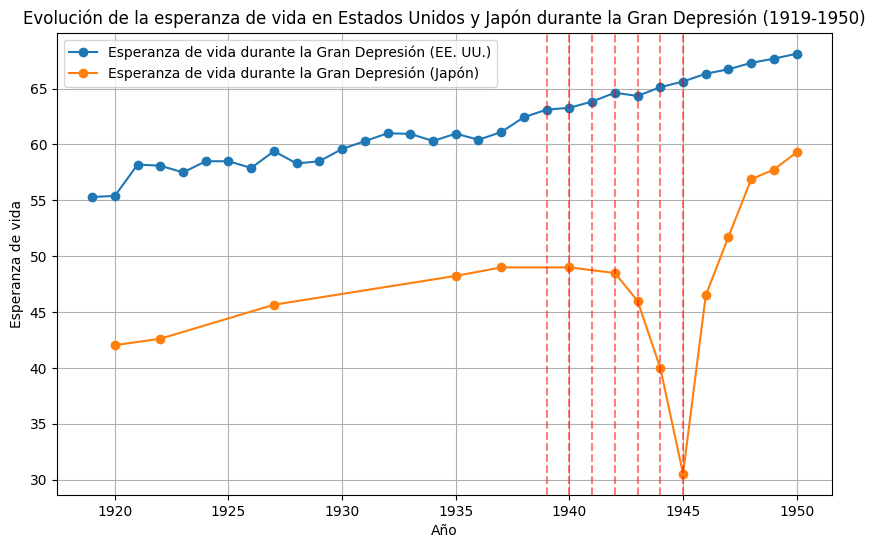

In [83]:

# Obtener datos para Estados Unidos
datos_usa = obtener_datos_para_pais(datos, "United States")

# Obtener datos para Japón
datos_japon = obtener_datos_para_pais(datos, "Japan")

# Filtrar los datos de esperanza de vida durante la Gran Depresión (1919-1950) para EE. UU. y Japón
life_depression_usa = [x[1] for x in datos_usa['lifeExpectancy'] if 1919 <= x[0] <= 1950]
life_depression_japon = [x[1] for x in datos_japon['lifeExpectancy'] if 1919 <= x[0] <= 1950]
years_depression_usa = [x[0] for x in datos_usa['lifeExpectancy'] if 1919 <= x[0] <= 1950]  # Tomamos los años de EE. UU.
years_depression_japon = [x[0] for x in datos_japon['lifeExpectancy'] if 1919 <= x[0] <= 1950]  # Tomamos los años de Japón

# Definir los años de la Segunda Guerra Mundial
ww2_years = range(1939, 1946)

# Graficar la esperanza de vida durante la Gran Depresión
plt.figure(figsize=(10, 6))
plt.plot(years_depression_usa, life_depression_usa, 'o-', label='Esperanza de vida durante la Gran Depresión (EE. UU.)')
plt.plot(years_depression_japon, life_depression_japon, 'o-', label='Esperanza de vida durante la Gran Depresión (Japón)')

# Agregar líneas verticales para indicar los años de la Segunda Guerra Mundial
for year in ww2_years:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.5)

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Esperanza de vida')
plt.title('Evolución de la esperanza de vida en Estados Unidos y Japón durante la Gran Depresión (1919-1950)')
plt.legend()

plt.grid(True)
plt.show()


### Conclusiones 
#### Con respecto al ingreso per capita 
Hay varios factores a considerar tales como Estados Unidos tenía una industria más desarrollada, menos dependencia agrícola y una economía diversificada, mientras que Japón estaba industrializándose y dependía más de la agricultura y las exportaciones de productos específicos como la seda y los textiles. Además, Estados Unidos contaba con abundantes recursos naturales, un crecimiento poblacional favorable y políticas gubernamentales más efectivas, mientras que Japón enfrentaba desafíos políticos y culturales que limitaban su crecimiento económico.

#### Con respecto a la esperanza de vida 
Después de la Segunda Guerra Mundial, Japón experimentó un gran impacto en su infraestructura, economía y salud pública. La devastación causada por la guerra, incluidos los bombardeos y la escasez de alimentos, contribuyó a una disminución en la esperanza de vida. Los servicios de salud fueron gravemente afectados, lo que dificultó el acceso a la atención médica y los medicamentos. Además, el trauma y el estrés de la guerra dejaron secuelas en la salud física y mental de la población, lo que también influyó en la esperanza de vida.